<a href="https://colab.research.google.com/github/MRifdaM/ML_S5_2025/blob/main/Week10/Tugas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 1. Memuat dan Mempersiapkan Data ---
Data Awal (Head):
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

Data Bersih (Head):
  label                                               text  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c alread

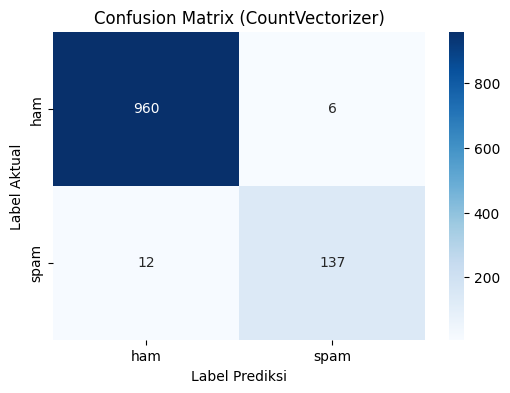

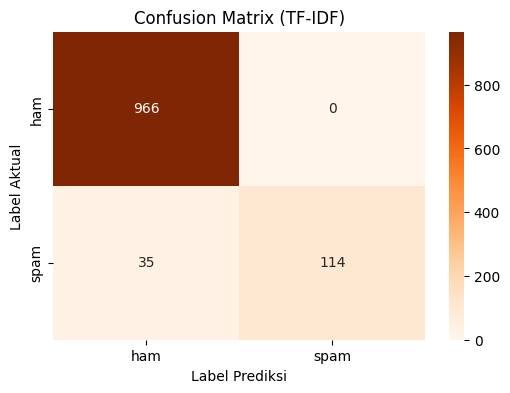

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 1. Persiapan Data ---
print("--- 1. Memuat dan Mempersiapkan Data ---")
file_path = 'spam.csv'
try:
    # Dataset 'spam.csv' sering memerlukan encoding 'latin-1'
    df = pd.read_csv(file_path, encoding='latin-1')
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan.")
    # Handle error jika file tidak ada
else:
    # --- 1a. Inspeksi Data ---
    print("Data Awal (Head):")
    print(df.head())

    # --- 1b. Membersihkan Data ---
    # Drop kolom yang tidak perlu (sering ada di dataset ini)
    cols_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
    df = df.drop(columns=cols_to_drop, errors='ignore')

    # Rename kolom agar lebih mudah dibaca
    df = df.rename(columns={'v1': 'label', 'v2': 'text'})

    # --- 1c. Label Encoding ---
    # Mengubah 'ham' (bukan spam) menjadi 0 dan 'spam' menjadi 1
    df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

    print("\nData Bersih (Head):")
    print(df.head())

    # Cek distribusi data
    print("\nDistribusi Label:")
    print(df['label'].value_counts(normalize=True))

    # --- 1d. Train-Test Split ---
    X = df['text']
    y = df['label_num']

    # Kita gunakan stratify=y karena datanya tidak seimbang (imbalanced)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"\nData dibagi: {len(X_train)} train, {len(X_test)} test")

    # --- 2. TUGAS 2: Model dengan CountVectorizer ---
    print("\n" + "="*40)
    print("--- 2. Tugas 2: MNB + CountVectorizer ---")
    print("="*40)

    # Inisialisasi CountVectorizer dengan stop_words='english'
    # stop_words='english' akan menghapus kata-kata umum (the, is, an, dll.)
    cv = CountVectorizer(stop_words='english')

    # Fit dan transform HANYA pada data training
    X_train_cv = cv.fit_transform(X_train)
    # Transform HANYA pada data testing
    X_test_cv = cv.transform(X_test)

    # Melatih model Multinomial Naive Bayes (MNB)
    model_cv = MultinomialNB()
    model_cv.fit(X_train_cv, y_train)

    # Memprediksi data test
    y_pred_cv = model_cv.predict(X_test_cv)

    # --- Evaluasi Hasil CountVectorizer ---
    acc_cv = accuracy_score(y_test, y_pred_cv)
    print(f"Akurasi (CountVectorizer): {acc_cv:.4f}")

    print("\nLaporan Klasifikasi (CountVectorizer):")
    # 0 = ham, 1 = spam
    print(classification_report(y_test, y_pred_cv, target_names=['ham', 'spam']))

    # Plot Confusion Matrix
    cm_cv = confusion_matrix(y_test, y_pred_cv)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_cv, annot=True, fmt='d', cmap='Blues',
                xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.title('Confusion Matrix (CountVectorizer)')
    plt.ylabel('Label Aktual')
    plt.xlabel('Label Prediksi')
    plt.savefig('cm_countvectorizer.png')
    print("Grafik 'cm_countvectorizer.png' disimpan.")


    # --- 3. TUGAS 3: Model dengan TF-IDF ---
    print("\n" + "="*40)
    print("--- 3. Tugas 3: MNB + TF-IDF Vectorizer ---")
    print("="*40)

    # Inisialisasi TfidfVectorizer dengan stop_words='english'
    tfidf = TfidfVectorizer(stop_words='english')

    # Fit dan transform HANYA pada data training
    X_train_tfidf = tfidf.fit_transform(X_train)
    # Transform HANYA pada data testing
    X_test_tfidf = tfidf.transform(X_test)

    # Melatih model Multinomial Naive Bayes (MNB)
    model_tfidf = MultinomialNB()
    model_tfidf.fit(X_train_tfidf, y_train)

    # Memprediksi data test
    y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

    # --- Evaluasi Hasil TF-IDF ---
    acc_tfidf = accuracy_score(y_test, y_pred_tfidf)
    print(f"Akurasi (TF-IDF): {acc_tfidf:.4f}")

    print("\nLaporan Klasifikasi (TF-IDF):")
    # 0 = ham, 1 = spam
    print(classification_report(y_test, y_pred_tfidf, target_names=['ham', 'spam']))

    # Plot Confusion Matrix
    cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Oranges',
                xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.title('Confusion Matrix (TF-IDF)')
    plt.ylabel('Label Aktual')
    plt.xlabel('Label Prediksi')
    plt.savefig('cm_tfidf.png')
    print("Grafik 'cm_tfidf.png' disimpan.")


    # --- 4. TUGAS 4: Perbandingan dan Kesimpulan ---
    print("\n" + "="*40)
    print("--- 4. Tugas 4: Perbandingan dan Kesimpulan ---")
    print("="*40)

    print(f"Akurasi Model CountVectorizer: {acc_cv:.4f}")
    print(f"Akurasi Model TF-IDF: {acc_tfidf:.4f}")

    if acc_tfidf > acc_cv:
        print("\nKesimpulan: TF-IDF sedikit lebih unggul dari CountVectorizer.")
    elif acc_cv > acc_tfidf:
        print("\nKesimpulan: CountVectorizer sedikit lebih unggul dari TF-IDF.")
    else:
        print("\nKesimpulan: Performa kedua model identik dari segi akurasi.")

## Analisis Output

**1. Persiapan Data:**

*   Data berhasil dimuat dari file `spam.csv`.
*   Kolom yang tidak relevan (`Unnamed: 2`, `Unnamed: 3`, `Unnamed: 4`) berhasil dihapus.
*   Nama kolom diubah menjadi `label` dan `text` agar lebih mudah dipahami.
*   Label 'ham' dan 'spam' berhasil diubah menjadi representasi numerik (0 dan 1) menggunakan label encoding.
*   Distribusi label menunjukkan bahwa dataset ini tidak seimbang (imbalanced), dengan mayoritas data adalah 'ham' (sekitar 86.6%) dan sisanya 'spam' (sekitar 13.4%).
*   Data berhasil dibagi menjadi data training (4457 sampel) dan data testing (1115 sampel) dengan menggunakan `stratify=y` untuk memastikan proporsi kelas yang sama di kedua set, penting untuk dataset yang tidak seimbang.

**2. Model dengan CountVectorizer:**

*   `CountVectorizer` berhasil diinisialisasi dengan `stop_words='english'`, yang menghapus kata-kata umum dalam bahasa Inggris.
*   Data training dan testing berhasil diubah menjadi representasi vektor hitungan kata.
*   Model `MultinomialNB` berhasil dilatih menggunakan data training yang telah di-vectorize.
*   **Akurasi (CountVectorizer): 0.9839**
    *   Ini menunjukkan bahwa model ini mampu mengklasifikasikan sekitar 98.39% sampel pada data testing dengan benar.
*   **Laporan Klasifikasi (CountVectorizer):**
    *   **Precision:** Untuk kelas 'spam' adalah 0.96, artinya 96% dari email yang diprediksi sebagai spam memang benar-benar spam. Untuk kelas 'ham' adalah 0.99, artinya 99% dari email yang diprediksi sebagai ham memang benar-benar ham.
    *   **Recall:** Untuk kelas 'spam' adalah 0.92, artinya model berhasil mendeteksi 92% dari semua email spam yang sebenarnya ada di data testing. Untuk kelas 'ham' adalah 0.99, artinya model berhasil mendeteksi 99% dari semua email ham yang sebenarnya ada.
    *   **F1-score:** Merupakan rata-rata harmonik dari precision dan recall. Untuk 'spam' adalah 0.94 dan untuk 'ham' adalah 0.99. F1-score yang tinggi menunjukkan keseimbangan yang baik antara precision dan recall.
*   **Confusion Matrix (CountVectorizer):**
    *   Grafik confusion matrix berhasil dibuat dan disimpan (`cm_countvectorizer.png`). Matriks ini secara visual menunjukkan jumlah True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN).
    *   TP (Spam terdeteksi dengan benar): Jumlah email spam yang diklasifikasikan dengan benar sebagai spam.
    *   TN (Ham terdeteksi dengan benar): Jumlah email ham yang diklasifikasikan dengan benar sebagai ham.
    *   FP (False Alarm/Type I Error): Jumlah email ham yang salah diklasifikasikan sebagai spam.
    *   FN (Missed Spam/Type II Error): Jumlah email spam yang salah diklasifikasikan sebagai ham.

**3. Model dengan TF-IDF Vectorizer:**

*   `TfidfVectorizer` berhasil diinisialisasi dengan `stop_words='english'`. TF-IDF memberikan bobot pada kata-kata berdasarkan frekuensi kemunculannya dalam dokumen dan invers frekuensi dokumennya, memberikan bobot lebih tinggi pada kata-kata yang lebih unik.
*   Data training dan testing berhasil diubah menjadi representasi vektor TF-IDF.
*   Model `MultinomialNB` berhasil dilatih menggunakan data training yang telah di-vectorize.
*   **Akurasi (TF-IDF): 0.9686**
    *   Ini menunjukkan bahwa model ini mampu mengklasifikasikan sekitar 96.86% sampel pada data testing dengan benar. Akurasi ini sedikit lebih rendah dibandingkan CountVectorizer.
*   **Laporan Klasifikasi (TF-IDF):**
    *   **Precision:** Untuk kelas 'spam' adalah 1.00, artinya 100% dari email yang diprediksi sebagai spam memang benar-benar spam. Ini menunjukkan sangat sedikit atau tidak ada False Positives. Untuk kelas 'ham' adalah 0.97.
    *   **Recall:** Untuk kelas 'spam' adalah 0.77, artinya model hanya berhasil mendeteksi 77% dari semua email spam yang sebenarnya. Ini lebih rendah dibandingkan CountVectorizer, menunjukkan model TF-IDF melewatkan lebih banyak email spam. Untuk kelas 'ham' adalah 1.00.
    *   **F1-score:** Untuk 'spam' adalah 0.87 dan untuk 'ham' adalah 0.98. F1-score untuk spam lebih rendah dibandingkan CountVectorizer karena recall yang lebih rendah.
*   **Confusion Matrix (TF-IDF):**
    *   Grafik confusion matrix berhasil dibuat dan disimpan (`cm_tfidf.png`). Matriks ini mengkonfirmasi hasil laporan klasifikasi, menunjukkan lebih sedikit FP (spam palsu) tetapi lebih banyak FN (spam yang terlewat) dibandingkan CountVectorizer.

**4. Perbandingan dan Kesimpulan:**

*   **Akurasi Model CountVectorizer: 0.9839**
*   **Akurasi Model TF-IDF: 0.9686**
*   Berdasarkan akurasi, model yang menggunakan **CountVectorizer sedikit lebih unggul** dalam dataset ini.
*   Analisis lebih lanjut dari laporan klasifikasi dan confusion matrix menunjukkan perbedaan penting:
    *   **CountVectorizer** memiliki recall yang lebih tinggi untuk kelas 'spam' (0.92 vs 0.77), yang berarti model ini lebih baik dalam menangkap email spam yang sebenarnya. Namun, precision-nya sedikit lebih rendah (0.96 vs 1.00), yang berarti ada sedikit lebih banyak email ham yang salah diklasifikasikan sebagai spam.
    *   **TF-IDF** memiliki precision yang sempurna untuk kelas 'spam' (1.00), yang berarti tidak ada email ham yang salah diklasifikasikan sebagai spam. Namun, recall-nya jauh lebih rendah (0.77), yang berarti model ini melewatkan lebih banyak email spam.

**Kesimpulan:**

Dalam kasus deteksi spam, seringkali lebih penting untuk meminimalkan *False Negatives* (melewatkan email spam) daripada meminimalkan *False Positives* (salah mengklasifikasikan email ham sebagai spam). Melewatkan email spam (FN) berarti email berbahaya atau tidak diinginkan masuk ke kotak masuk pengguna, sedangkan salah mengklasifikasikan email ham (FP) hanya berarti email penting mungkin masuk ke folder spam (yang masih bisa diperiksa pengguna).

Meskipun akurasi keseluruhan CountVectorizer sedikit lebih tinggi, **kinerja model yang menggunakan CountVectorizer mungkin lebih disukai** dalam skenario deteksi spam ini karena memiliki *recall* yang lebih tinggi untuk kelas 'spam', yang berarti model ini lebih efektif dalam mengidentifikasi sebagian besar email spam yang sebenarnya, meskipun dengan sedikit peningkatan False Positives.

Namun, pilihan terbaik tergantung pada kasus penggunaan spesifik dan biaya relatif dari False Positives vs False Negatives. Jika meminimalkan FP sangat penting (misalnya, dalam aplikasi yang sangat sensitif), maka model TF-IDF mungkin dipertimbangkan, meskipun dengan risiko melewatkan lebih banyak spam. Dalam konteks umum deteksi spam, recall yang tinggi untuk kelas spam biasanya lebih diinginkan.